# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah "Email Spam Classification Dataset" yang diperoleh dari Kaggle (https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset?resource=download). Dataset ini berisi kumpulan teks email yang dikategorikan sebagai "spam" (pesan sampah) atau "ham" (pesan normal).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resource NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Library berhasil diimpor!")

Library berhasil diimpor!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luthf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luthf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luthf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
# Path file
file_path = '../email_spam_raw/spam.csv'

# Load dataset
df = pd.read_csv(file_path)

# Hapus kolom Unnamed jika ada
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Memastikan nama kolom
df.columns = ['label', 'text']

# Ubah tipe data label menjadi integer (angka 0/1)
# Mengubah yang bukan angka menjadi NaN
df['label'] = pd.to_numeric(df['label'], errors='coerce')
df = df.dropna(subset=['label']) # Hapus baris jika ada label yang NaN
df['label'] = df['label'].astype(int)

print(f"Dataset dimuat dengan ukuran: {df.shape}")
display(df.head())

Dataset dimuat dengan ukuran: (83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None

Jumlah Null Values:
label    0
text     0
dtype: int64
Jumlah Duplikasi: 0


C:\Users\luthf\AppData\Local\Temp\ipykernel_4148\2713581691.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, ax=ax[1], palette=['#66b3ff','#ff9999'])


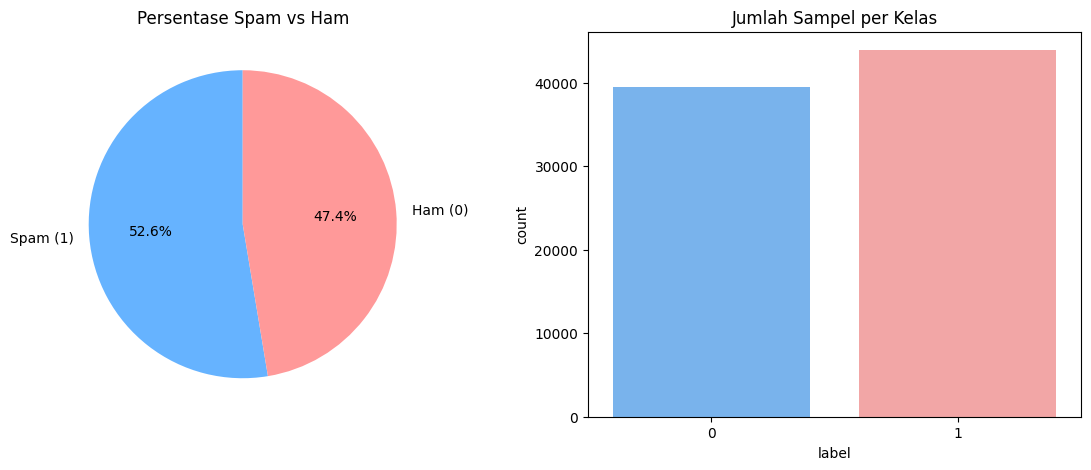

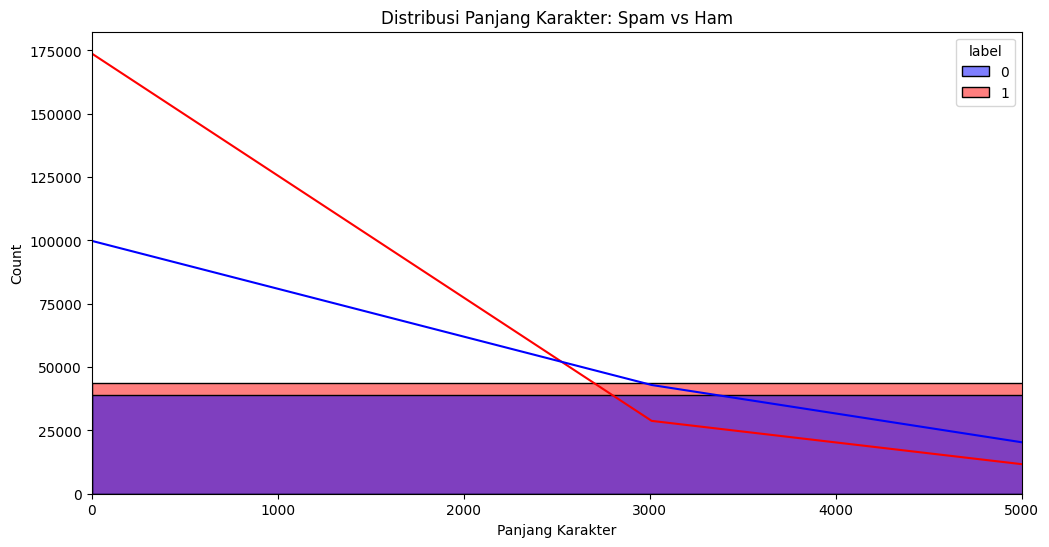


Statistik Panjang Teks:
         count         mean          std  min    25%     50%     75%       max
label                                                                         
0      39538.0  2121.693814  5666.075286  1.0  579.0  1139.0  2174.0  598705.0
1      43910.0  1249.887247  1978.631507  1.0  360.0   704.0  1510.0  144087.0

Contoh Email Spam (Raw):
ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage


In [7]:
# 1. Info Dataset
print("Info Dataset:")
print(df.info())

# 2. Cek Null dan Duplikat
print(f"\nJumlah Null Values:\n{df.isnull().sum()}")
print(f"Jumlah Duplikasi: {df.duplicated().sum()}")

# 3. Visualisasi Distribusi Kelas
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Persentase
counts = df['label'].value_counts()
labels = ['Ham (0)', 'Spam (1)']
if counts.index[0] == 1: labels = ['Spam (1)', 'Ham (0)']

ax[0].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
ax[0].set_title('Persentase Spam vs Ham')

# Plot 2: Jumlah Bar
sns.countplot(x='label', data=df, ax=ax[1], palette=['#66b3ff','#ff9999'])
ax[1].set_title('Jumlah Sampel per Kelas')
plt.show()

# 4. Analisis Panjang Teks
# Menghitung panjang karakter tiap email
df['text_length'] = df['text'].astype(str).apply(len)

# Visualisasi distribusi panjang teks
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette=['blue', 'red'])
plt.title('Distribusi Panjang Karakter: Spam vs Ham')
plt.xlabel('Panjang Karakter')
plt.xlim(0, 5000)
plt.show()

print("\nStatistik Panjang Teks:")
print(df.groupby('label')['text_length'].describe())

# 5. Contoh Email
print("\nContoh Email Spam (Raw):")
print(df[df['label'] == 1]['text'].iloc[0][:500]) # Print 500 karakter pertama

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# 1. Hapus Duplikat
initial_rows = df.shape[0]
df = df.drop_duplicates(keep='first')
print(f"Berhasil menghapus {initial_rows - df.shape[0]} duplikasi.")
print(f"Ukuran dataset sekarang: {df.shape}")

# 2. Fungsi Cleaning Teks
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Ubah ke lowercase
    text = str(text).lower()
    # Hapus karakter spesial & angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenisasi
    words = text.split()
    # Hapus stopwords dan Lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Gabung kembali
    return " ".join(cleaned_words)

# Terapkan cleaning teks
print("Sedang melakukan cleaning teks...")
df['clean_text'] = df['text'].apply(clean_text)

# Hapus baris yang setelah dicleaning menjadi kosong
df = df[df['clean_text'].str.strip() != '']


# Rename kolom label menjadi target
df = df.rename(columns={'label': 'target'})

# Tampilkan hasil akhir
print("\nHasil Preprocessing:")
display(df[['text', 'clean_text', 'target']].head())

Berhasil menghapus 0 duplikasi.
Ukuran dataset sekarang: (83448, 3)
Sedang melakukan cleaning teks...

Hasil Preprocessing:


,text,clean_text,target
0,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,1
1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...,1
2,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...,0
3,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...,1
4,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...,0
